In [2]:
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple, to_plot
from snn_delays.utils.test_behavior import tb_addtask_refact
# from snn_delays.utils.visualization_utils import plot_taus
import numpy as np
device = get_device()

c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


V5: noisier and more realistic

In [3]:
time_window = 50
batch_size = 128 # 128: anil kag

ckpt_dir = 'copymemory_04_2025_tests'

dataset = 'copymemory_episodic'
#dataset = 'addtask' 

num_epochs = 3000 # important: epochs here refer to iteration steps

dataset_size = batch_size*num_epochs

DL = DatasetLoader(dataset=dataset, caching='gpu', 
                   dataset_size = dataset_size,
                   num_workers=0, batch_size=batch_size, 
                   total_time=time_window)

train_loader, test_loader, dataset_dict = DL.get_dataloaders()
dataset_dict["time_ms"] = 2e3


Training copy memory task

In [4]:
num_h = 128

extra_kwargs = {'multifeedforward':3}
snn_f = SNN(dataset_dict, structure=(num_h, 2, 'mf'), win=time_window,
             loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_f.set_layers()
#snn_f.num_train_samples = batch_size
snn_f.to(device)

snn_rnn = SNN(dataset_dict, structure=(num_h, 2, 'r'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False)

snn_rnn.set_layers()
#snn_rnn.num_train_samples = batch_size
snn_rnn.to(device)

extra_kwargs = {'delay_range':(40, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(num_h, 2, 'd'), win=time_window,
               loss_fn='mem_prediction', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn_rd.set_layers()
#snn_rd.num_train_samples = batch_size
snn_rd.to(device)

Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms
Delta t: 40.0 ms


SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=3, out_features=128, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=5120, out_features=128, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=128, out_features=5, bias=False)
    )
  )
)

28 min

In [5]:
lr_tau = 1.0
train(snn_f, train_loader, test_loader, 1e-3, 10, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)
train(snn_rnn, train_loader, test_loader, 1e-3, 10, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)
train(snn_rd, train_loader, test_loader, 1e-3, 10, ckpt_dir=ckpt_dir, test_behavior=tb_addtask_refact, 
      scheduler=(100, 0.95), clear=False, lr_tau=lr_tau, printed_steps=10)

Epoch [1/10], learning_rates 0.001000, 1.000000


C:\Users\Alberto\Python\SNNdelays\snn_delays\datasets\sequential_datasets.py:280: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3641.)
  label[:,0] = seq[start_time:start_time + mem_length, 0].T.clone().detach()
c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your us

Step [300/3000], Loss: 0.06796
Step [600/3000], Loss: 0.06354
Step [900/3000], Loss: 0.05658
Step [1200/3000], Loss: 0.06251
Step [1500/3000], Loss: 0.06619
Step [1800/3000], Loss: 0.06307
Step [2100/3000], Loss: 0.05761
Step [2400/3000], Loss: 0.05917
Step [2700/3000], Loss: 0.05793
Step [3000/3000], Loss: 0.05574
384000
Time elasped: 904.5122067928314
Epoch [2/10], learning_rates 0.001000, 1.000000
Step [300/3000], Loss: 0.05986
Step [600/3000], Loss: 0.05059
Step [900/3000], Loss: 0.05345
Step [1200/3000], Loss: 0.05313
Step [1500/3000], Loss: 0.05020
Step [1800/3000], Loss: 0.05360
Step [2100/3000], Loss: 0.04887
Step [2400/3000], Loss: 0.04733
Step [2700/3000], Loss: 0.04938
Step [3000/3000], Loss: 0.04830
384000
Time elasped: 682.9553525447845
Epoch [3/10], learning_rates 0.001000, 1.000000
Step [300/3000], Loss: 0.05201
Step [600/3000], Loss: 0.04995
Step [900/3000], Loss: 0.04759
Step [1200/3000], Loss: 0.04862
Step [1500/3000], Loss: 0.04772
Step [1800/3000], Loss: 0.04765
Ste

KeyboardInterrupt: 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

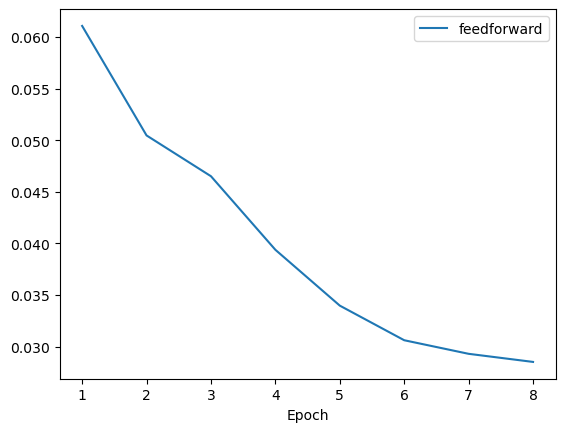

In [6]:
import numpy as np
from snn_delays.utils.visualization_utils import plot_per_epoch
import matplotlib.pyplot as plt
loss_error = np.mean(np.array(snn_f.train_loss)[:,1][-100:])
plot_per_epoch(snn_f.train_loss, label = 'feedforward')
plot_per_epoch(snn_rnn.train_loss, label = 'recurrent')
plot_per_epoch(snn_rd.train_loss, label = 'delays')
#plt.title(f'loss error = {loss_error}')

plt.ylim(0, 0.3)
plt.title('train loss')

In [7]:
snn_f.debug = True
snn_rnn.debug = True
snn_rd.debug = True
snn_f.init_state_logger()
snn_rnn.init_state_logger()
snn_rd.init_state_logger()

from snn_delays.utils.train_utils_refact_minimal import propagate_batch_simple
images, labels_mf = propagate_batch_simple(snn_f, test_loader)
_, labels_rnn = propagate_batch_simple(snn_rnn, test_loader)
_, labels_rd = propagate_batch_simple(snn_rd, test_loader)

In [8]:
ref_mf = labels_mf[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_mf = snn_f.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rnn = labels_rnn[:,:int(0.1*time_window), :].permute(1, 0, 2).cpu().numpy()
out_rnn = snn_rnn.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

ref_rd = labels_rd[:,:int(0.1*time_window),:].permute(1, 0, 2).cpu().numpy()
out_rd = snn_rd.mem_state['output'][int(0.9*time_window):].detach().cpu().numpy()

In [9]:
print(np.abs(ref_mf - out_mf).sum())
print(np.abs(ref_rnn - out_rnn).sum())
print(np.abs(ref_rd - out_rd).sum())

410.53284
1365.0483
1603.0


In [10]:
from snn_delays.utils.visualization_utils import plot_add_task, plot_add_task2, plot_add_task3, plot_add_task4
# Create a figure with 3 rows and N columns (for stacking results horizontally)

def plot_add_task(output, reference, N, axes=None, name=''):

    ns = 50 # num samples to display for better viz

    ref = reference[:, :ns , N]
    out = output[:, :ns , N]
    diff = abs(ref-out)

    print(np.mean(diff))

    if axes is None:
        fig, axes = plt.subplots(3, 1, figsize=(5, 10))  # Create a new figure if axes not provided

    axes[0].imshow(ref, vmin=0, vmax=0.9)
    axes[0].set_title('Reference '+name)
    axes[0].set_ylabel('Time')

    axes[1].imshow(out, vmin=0, vmax=0.9)
    axes[1].set_title('Output')
    axes[1].set_ylabel('Time')

    axes[2].imshow(diff, vmin=0.0, vmax=1.0)
    axes[2].set_title('Difference')
    axes[2].set_ylabel('Time')
    axes[2].set_xlabel('Training Sample')

    return axes  # Return the axes to be used in an external figure

0.14349316
0.5822892
0.548


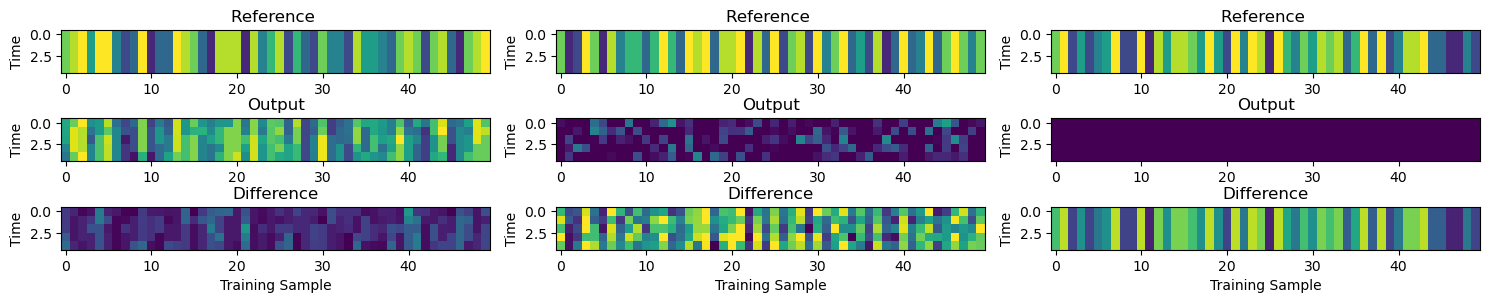

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 0, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 0, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 0, axes[:, 2])  

plt.tight_layout()
plt.show()

0.17820112
0.3284081
0.526


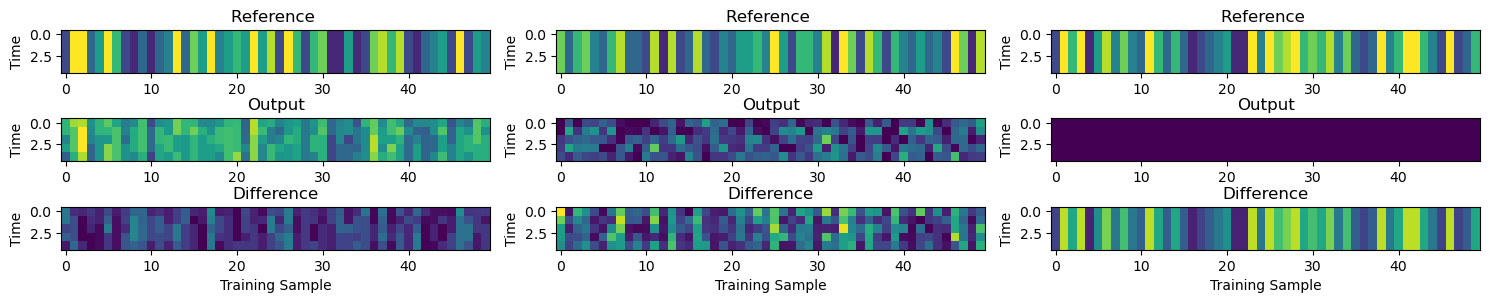

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 1, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 1, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 1, axes[:, 2])  

plt.tight_layout()
plt.show()

0.12019729
0.28602204
0.432


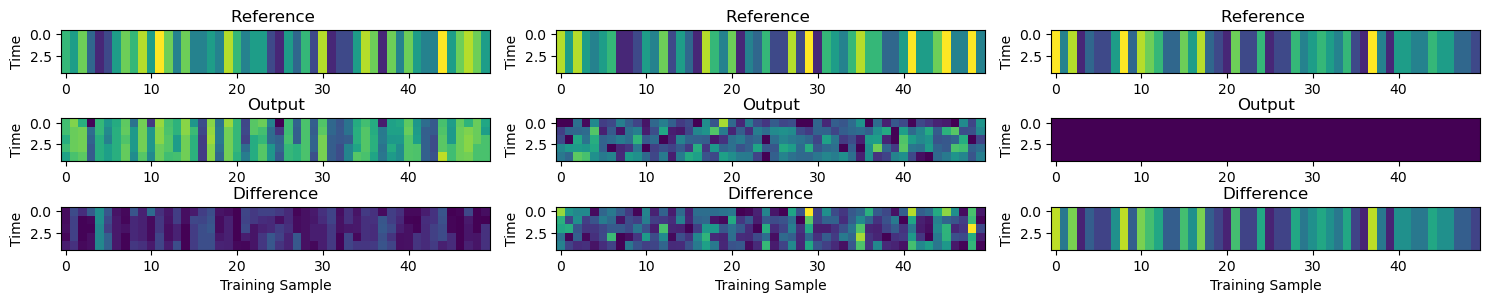

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 2, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 2, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 2, axes[:, 2])  

plt.tight_layout()
plt.show()

0.10131669
0.41636053
0.518


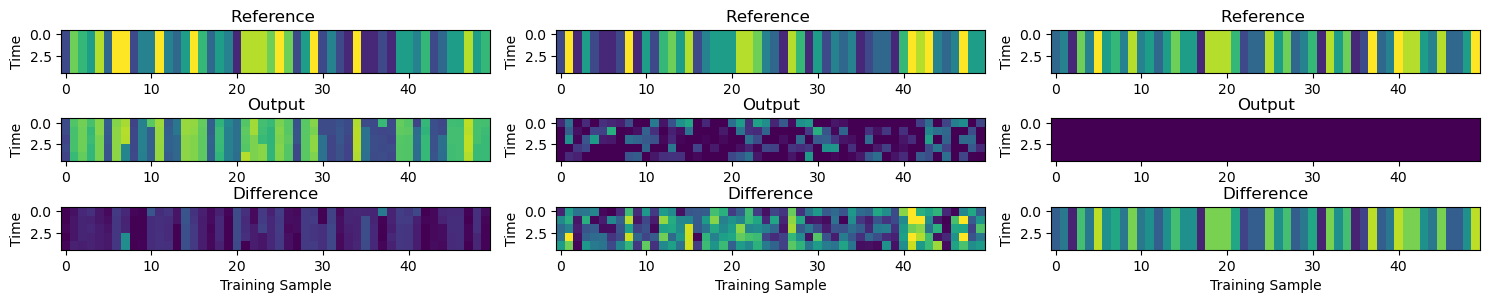

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 3, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 3, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 3, axes[:, 2])  

plt.tight_layout()
plt.show()

0.08071182
0.5343741
0.532


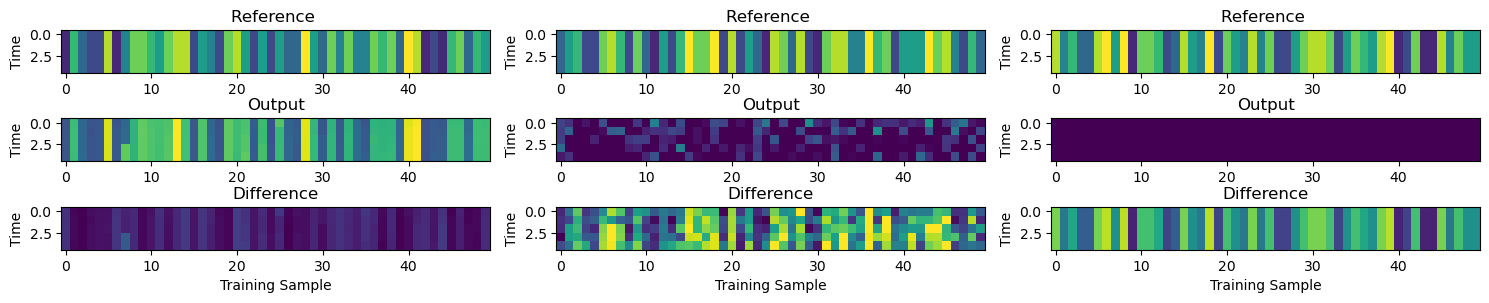

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15, 3))  # 3 rows, 2 columns

plot_add_task(out_mf, ref_mf, 4, axes[:, 0])  
plot_add_task(out_rnn, ref_rnn, 4, axes[:, 1])  
plot_add_task(out_rd, ref_rd, 4, axes[:, 2])  

plt.tight_layout()
plt.show()